In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ajout du dossier src au path
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Imports du projet
from processing.data_processing import load_data
from processing.statistics_ import save_statistics
from visualization.visualization import plot_data



In [2]:
df = load_data("../data/energy_data.csv")
df.head()


,date,index,price_per_kwh,devices,temps,consumption_kwh,cost
0,2024-12-06,8000,0.12,Fridge,soleil,0.0,0.00
1,2024-12-07,8100,0.12,"Fridge, Oven",pluie,100.0,12.00
2,2024-12-08,8300,0.11,"Fridge, TV",mitigé,200.0,22.00
3,2024-12-09,7800,0.12,"Fridge, Oven, Dryer",soleil,-500.0,-60.00
4,2024-12-10,7648,0.09,"Fridge, Dryer",mitigé,-152.0,-13.68


In [3]:
# Statistiques descriptives
df.describe()

,date,index,price_per_kwh,consumption_kwh,cost
count,46,46.000000,46.000000,46.000000,46.000000
mean,2024-12-28 12:00:00,10065.826087,0.113696,113.695652,13.141304
min,2024-12-06 00:00:00,7648.000000,0.090000,-500.000000,-60.000000
25%,2024-12-17 06:00:00,8337.500000,0.100000,110.000000,13.125000
50%,2024-12-28 12:00:00,9925.000000,0.115000,150.000000,16.500000
75%,2025-01-08 18:00:00,11595.000000,0.120000,150.000000,18.150000
max,2025-01-20 00:00:00,13230.000000,0.140000,700.000000,84.000000
std,NaN,1781.129371,0.013721,158.189741,18.517185


In [4]:
# Affichage des dates disponibles
# 📅 Affichage des dates disponibles
df["date"].min(), df["date"].max()



(Timestamp('2024-12-06 00:00:00'), Timestamp('2025-01-20 00:00:00'))

In [5]:
# Appareils les plus utilisés
from collections import Counter

device_list = df["devices"].str.split(", ").sum()
device_counts = Counter(device_list)

pd.DataFrame(device_counts.most_common(), columns=["Appareil", "Occurrences"])


,Appareil,Occurrences
0,Fridge,46
1,Oven,21
2,TV,17
3,Dryer,17
4,PC,7


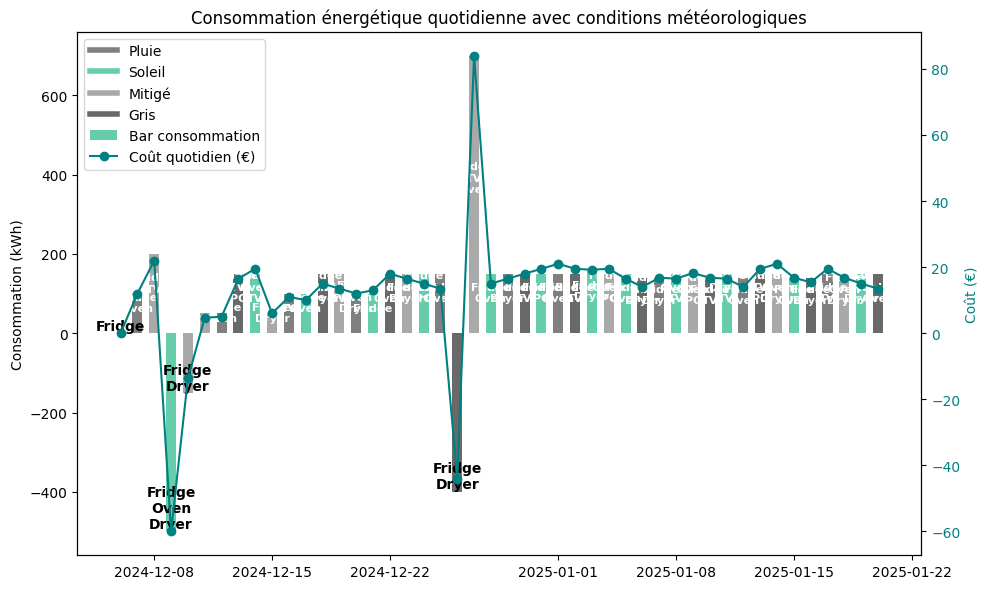

In [6]:
# Affichage matplotlib
%matplotlib inline
plot_data(df)
